In [1]:
import Issue_Tracking_Engine as En

from tqdm import tqdm
import pandas as pd
import numpy as np
import os
import math
import statistics as st

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib.gridspec as gridspec

In [2]:
from konlpy.tag import Mecab
mecab = Mecab(dicpath=r"C:\mecab\mecab-ko-dic")

import smart_open
smart_open.open = smart_open.smart_open

from gensim.corpora import Dictionary
from gensim.models.ldamodel import LdaModel
from gensim.models import CoherenceModel

In [3]:
Root_Path = "D:/1_News_Issue_Tracking/"

Data_Folder_Path = os.path.join(Root_Path,"1_Data/")

Data_File = os.path.join(Data_Folder_Path,"Data_News.csv")
Data_Stopword = os.path.join(Data_Folder_Path,"Data_Stopword.txt")
Data_Font = os.path.join(Data_Folder_Path,"NanumBarunGothic.ttf") 

Result_Folder = os.path.join(Root_Path,"3_Result/")
Result_Save_Excel_Path = os.path.join(Result_Folder,"Result_Topic_Excel.xlsx")

In [4]:
Data = pd.read_csv(Data_File, index_col=0)

In [5]:
Data

,day,title,text,link
newspaper,,,,
뉴스1,2019.08.01,8월 충북 곳곳서 종목별 생활체육대회 '풍성',개 대회 여명 선수 참가 청주 뉴스 월 한 달 충북 도내 곳곳에서 여름 무더위를 ...,https://news.naver.com/main/read.nhn?mode=LSD&...
뉴스1,2019.08.01,옥천 ‘향수시네마’ 개관 1주년…관람객 6만9000명 돌파,일 개관 주년 맞는 충북 옥천군의 작은 영화관 향수시네마 전경 옥천 뉴스 충북 옥...,https://news.naver.com/main/read.nhn?mode=LSD&...
뉴스1,2019.08.01,“폭염도 막지 못한다“ 8월에도 전북서 체육행사 풍성,전북체육회 전경 뉴스 전북 뉴스 폭염 속에서도 선수들의 뜨거운 열정은 계속된다 일 ...,https://news.naver.com/main/read.nhn?mode=LSD&...
뉴스1,2019.08.01,"김해시, 진영스포츠센터 건립 본격화…설계당선작 확정",김해 진영스포츠센터 설계당선작 조감도 김해시 제공 뉴스 경남 뉴스 경남 김해시가 진...,https://news.naver.com/main/read.nhn?mode=LSD&...
뉴시스,2019.08.01,옥천 향수시네마 개관 첫 돌…관람객 6만9000명 돌파,지역 문화사랑방 역할 톡톡히 옥천 뉴시스 충북 옥천의 작은 영화관 향수시네마 상영관...,https://news.naver.com/main/read.nhn?mode=LSD&...
...,...,...,...,...
MK스포츠,2020.08.31,"대한체육회 대의원총회, 올림픽위원회 기능 분리 반대 (전문)",매경닷컴 스포츠 대한체육회 회장 이기흥 대의원 일동은 월 일 결의문을 발표하고 최근...,https://sports.news.naver.com/news.nhn?oid=410...
서울신문,2020.08.31,대한체육회 “NOC 분리 반대” 결의문 발표,대한체육회 제공대한체육회가 올림픽위원회 기능 분리안에 반대 성명을 냈다 대한체육회는...,https://sports.news.naver.com/news.nhn?oid=081...
연합뉴스,2020.08.31,"대구시체육회, 산하 지회 간부 갑질·직장 내 괴롭힘 조사",직장내 괴롭힘 방지법 장현경 제작 사진합성 일러스트 재판매 및 금지 대구 연합뉴스 ...,https://sports.news.naver.com/news.nhn?oid=001...


In [6]:
Processed_Data = En.Data_Preprocess(Data)

전처리 전, 데이터 수 ; 8610 

전처리 후, Null값 여부 : False
전처리 후, 데이터 수 ; 8607 



In [7]:
Text_Data = Processed_Data['text']

In [8]:
Tokenized_Data = En.Data_Tokenizing(Text_Data, mecab, Data_Stopword, '\n')

100%|█████████████████████████████████████████████████████████████████████████████| 8607/8607 [00:25<00:00, 331.08it/s]


In [9]:
Index2Word_Data = Dictionary(Tokenized_Data)
TermDoc_Data = [Index2Word_Data.doc2bow(text) for text in Tokenized_Data]

In [10]:
params = {"Vocab": TermDoc_Data,
              "Idx2Word": Index2Word_Data,
               "Num_of_Topics_Weight": 10,
              "Randum_State":100,
              "Update_Every": 1,
              "Chunk_Size": 100,
              "Passes": 10,
              "Alpha": 'auto',
              "Start": 4,
              "End": 12,
              "Step": 1
              }

In [11]:
Model_Hypothesis, Coherence_Hypothesis, PPL_Hypothesis = En.Model_Hypothesis(params)

100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [09:11<00:00, 61.32s/it]


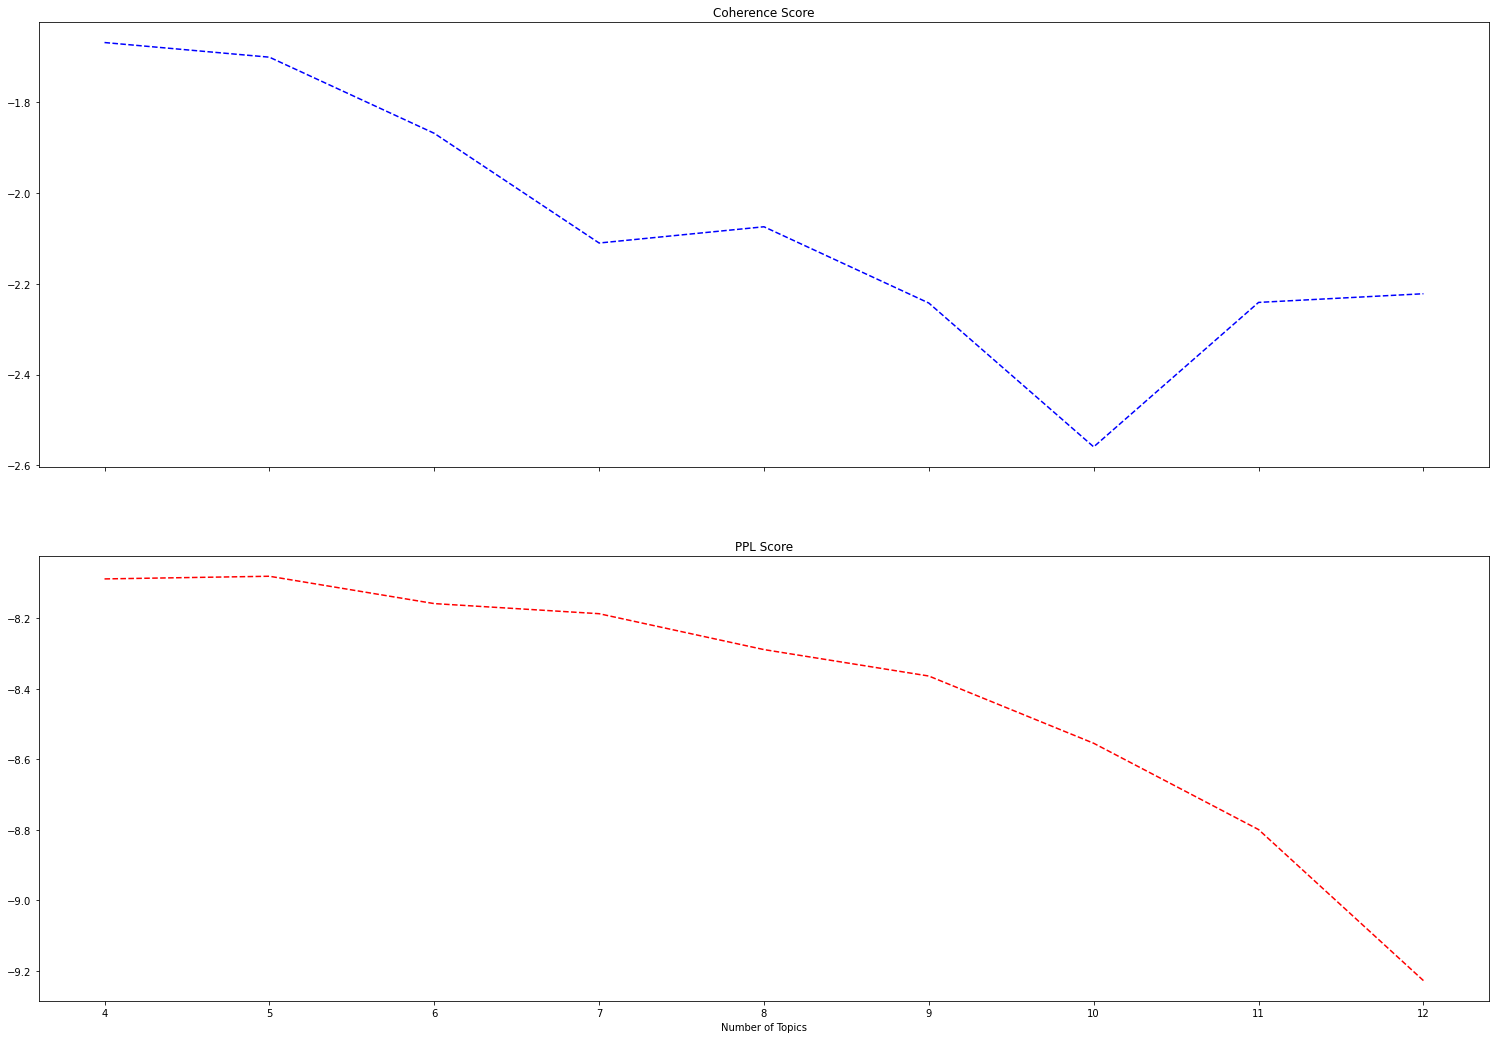

In [12]:
En.Visualization_Hypothesis(params, Coherence_Hypothesis, PPL_Hypothesis)

In [13]:
Model_Select = int(input())
Model = Model_Hypothesis[Model_Select]

6


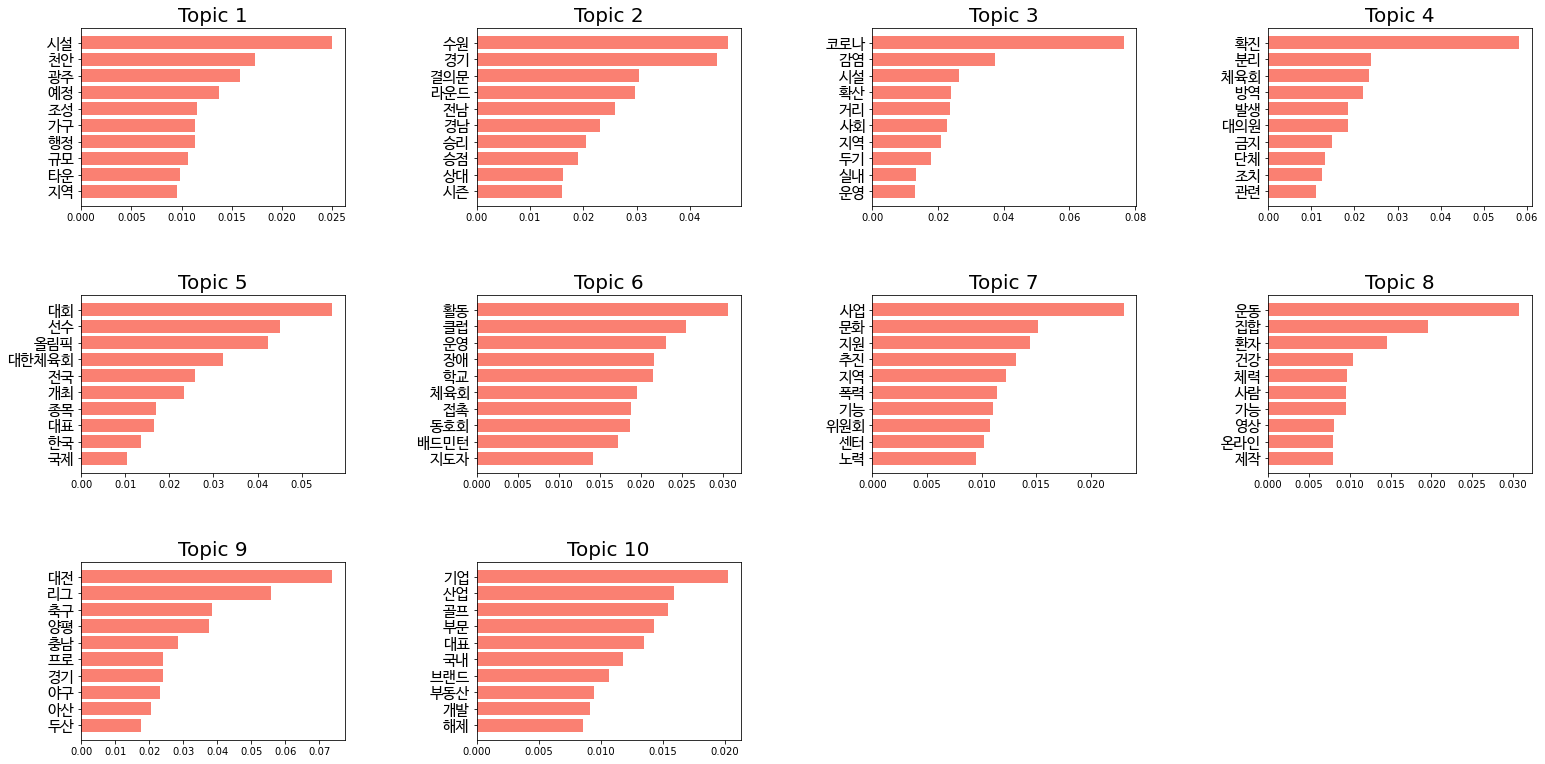

In [14]:
En.Visualization_Topic_Word(Model, 10)

In [15]:
Result_Excel = En.Result_Model_to_Excel(Model, params, Processed_Data, Result_Save_Excel_Path)

결과 저장 완료


In [16]:
Result, Data = En.Model_Issue_Tracking(Result_Excel, Model.num_topics)

13it [00:00, 13.54it/s]


In [17]:
Data

,Topic1,Topic2,Topic3,Topic4,Topic5,Topic6,Topic7,Topic8,Topic9,Topic10
Year_Month,,,,,,,,,,
2019.08,78.0,90.0,70.0,80.0,112.0,117.0,126.0,71.0,71.0,72.0
2019.09,97.0,74.0,107.0,77.0,125.0,118.0,125.0,71.0,85.0,84.0
2019.10,105.0,86.0,127.0,91.0,149.0,145.0,123.0,80.0,94.0,95.0
2019.11,77.0,83.0,84.0,52.0,123.0,93.0,102.0,70.0,86.0,78.0
2019.12,87.0,75.0,96.0,112.0,152.0,132.0,145.0,95.0,103.0,93.0
2020.01,100.0,97.0,98.0,144.0,109.0,123.0,148.0,89.0,107.0,86.0
2020.02,76.0,58.0,106.0,79.0,98.0,66.0,87.0,54.0,53.0,45.0
2020.03,54.0,51.0,72.0,63.0,88.0,59.0,79.0,59.0,47.0,63.0
2020.04,87.0,54.0,149.0,110.0,117.0,83.0,115.0,86.0,78.0,66.0


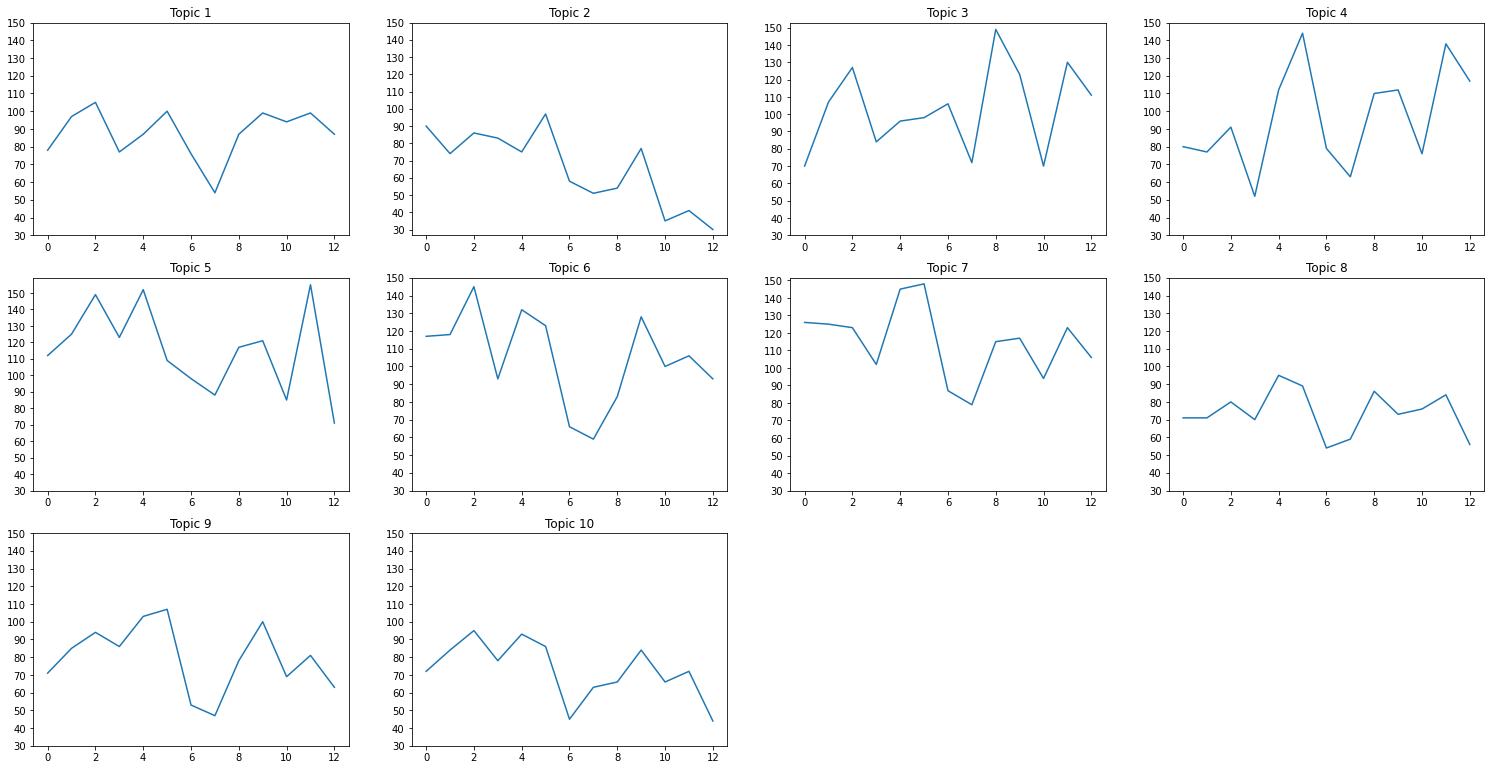

In [18]:
En.Visualization_Issue_Tracking(Data)